<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6-–-Pandas" data-toc-modified-id="6-–-Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>6 – Pandas</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#6.2.-Panda-Series" data-toc-modified-id="6.2.-Panda-Series-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>6.2. Panda Series</a></span><ul class="toc-item"><li><span><a href="#6.2.1.-Indexers:-LOC,-ILOC" data-toc-modified-id="6.2.1.-Indexers:-LOC,-ILOC-1.0.1.1"><span class="toc-item-num">1.0.1.1&nbsp;&nbsp;</span>6.2.1. Indexers: LOC, ILOC</a></span></li></ul></li><li><span><a href="#6.3.-Pandas-Dataframe-Objects" data-toc-modified-id="6.3.-Pandas-Dataframe-Objects-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>6.3. Pandas Dataframe Objects</a></span><ul class="toc-item"><li><span><a href="#6.3.1.-Column-Management-in-Dataframes" data-toc-modified-id="6.3.1.-Column-Management-in-Dataframes-1.0.2.1"><span class="toc-item-num">1.0.2.1&nbsp;&nbsp;</span>6.3.1. Column Management in Dataframes</a></span></li></ul></li><li><span><a href="#6.4.-Filters-in-Dataframes" data-toc-modified-id="6.4.-Filters-in-Dataframes-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>6.4. Filters in Dataframes</a></span><ul class="toc-item"><li><span><a href="#6.4.1.-Universal-functions-on-Pandas" data-toc-modified-id="6.4.1.-Universal-functions-on-Pandas-1.0.3.1"><span class="toc-item-num">1.0.3.1&nbsp;&nbsp;</span>6.4.1. Universal functions on Pandas</a></span></li><li><span><a href="#6.4.2.-Index-Alignment" data-toc-modified-id="6.4.2.-Index-Alignment-1.0.3.2"><span class="toc-item-num">1.0.3.2&nbsp;&nbsp;</span>6.4.2. Index Alignment</a></span></li><li><span><a href="#6.4.3.-Missing-Values" data-toc-modified-id="6.4.3.-Missing-Values-1.0.3.3"><span class="toc-item-num">1.0.3.3&nbsp;&nbsp;</span>6.4.3. Missing Values</a></span></li><li><span><a href="#6.4.4.-Guided-Activity-2.4" data-toc-modified-id="6.4.4.-Guided-Activity-2.4-1.0.3.4"><span class="toc-item-num">1.0.3.4&nbsp;&nbsp;</span>6.4.4. Guided Activity 2.4</a></span></li></ul></li></ul></li></ul></li></ul></div>

<img align="left" style="padding-right:10px;" width="150" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Star_Wars_Logo.svg/320px-Star_Wars_Logo.svg.png" />

*made by Ferran Carrascosa Mallafrè.*

< [Colecciones de objetos: numpy](modulo1_tema4_Py_31_numpy.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Control de flujo](modulo1_tema4_Py_40_contr_flujo.ipynb) >

__[Open in Colab](https://colab.research.google.com/github/griu/msc_python/blob/master/modulo1_tema4_Py_32_pandas.ipynb)__   *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! When you login to Colab, prepare the environment by running the following code.</span>*

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/msc_python.git /content/msc_python
    !git -C /content/msc_python pull
    %cd /content/msc_python

# 6 – Pandas

Pandas is an abbreviation for Panel Data. Objects within pandas support data analysis with variables of different types: categorical, binary, numeric...

Regarding the numpy, they allow indexing the rows and columns. This type of indexing makes it easier, for example, to perform time series analyses, not necessarily with a fixed frequency.

As always, the first step is to load the library with *namespace* `pd`:

In [2]:
import pandas as pd

##### 6.1. Guided Activity 2.4

This time, it's about selecting the best possible planet to locate the Jedi academy. The search parameters are:

- Long days to train a lot.
- Plenty of water to cool off.
- Low population density so as not to be disturbed.
- Good climate (temperate or tropical).

> "If there is a true center of the universe, now you are on the planet farthest from it"
     ―Luke Skywalker on Tatooine, the desert planet where Anakin and Luke Skywalker were born.

The first step is to load the planet data:

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for graphics style

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
planets_df = entidades_df['planets'][["rotation_period","diameter","climate"
                                      ,"temperate_tropical","gravity"
                                     ,"surface_water","population"]].dropna()
planets_df = planets_df[planets_df.diameter>0]


planets_df

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population
name,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07
Naboo,26.0,12120.0,temperate,1,1.00,12.0,4.500000e+09
Kamino,27.0,19720.0,temperate,1,1.00,100.0,1.000000e+09
Geonosis,30.0,11370.0,"temperate, arid",1,0.90,5.0,1.000000e+11
Utapau,27.0,12900.0,"temperate, arid, windy",1,1.00,0.9,9.500000e+07


### 6.2. Panda Series

They are defined as a one-dimensional indexed array.

It can be created from a list:

In [4]:
a = pd.Series([1.2, 0.4, 2.3])
a

0    1.2
1    0.4
2    2.3
dtype: float64

As you see, it joins values and index. We access the values in numpy format with `.values`:

In [5]:
a.values

array([1.2, 0.4, 2.3])

Indexes have their own type and are accessed with `.index`:

In [6]:
a.index

RangeIndex(start=0, stop=3, step=1)

Same features *slicing*, functions, *fancy indexing* as numpy arrays:

In [7]:
a[1:3] * 2

1    0.8
2    4.6
dtype: float64

We can declare the index explicitly:

In [8]:
a = pd.Series([1.2, 0.4, 2.3], index=['a','b','c'])
a

a    1.2
b    0.4
c    2.3
dtype: float64

Or, from a dictionary:

In [9]:
a = pd.Series({'a': 1.2, 'b': 0.4, 'c': 2.3})
a

a    1.2
b    0.4
c    2.3
dtype: float64

The index adds the ability to filter from its values:

In [10]:
a[['b','c']]

b    0.4
c    2.3
dtype: float64

It even has the methods of a dictionary:

In [11]:
a.keys()

Index(['a', 'b', 'c'], dtype='object')

In [12]:
list(a.items())

[('a', 1.2), ('b', 0.4), ('c', 2.3)]

#### 6.2.1. Indexers: LOC, ILOC

They are used to modify the behavior of filters.

Its function is to avoid collisions between indexes and positions. For example, the following string has integer indices:

In [13]:
a = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
a

1    a
3    b
5    c
dtype: object

If the value of index 1 is accessed.

In [14]:
a[1]

'a'

On the other hand, if the values of positions 1 to 3 are requested with slicing.

In [15]:
a[1:3]

3    b
5    c
dtype: object

To avoid these confusions, `.loc` is introduced, which allows access to values always based on the index.

In [16]:
a.loc[1]

'a'

In [17]:
a.loc[1:3]

1    a
3    b
dtype: object

By contrast, `.iloc` has the opposite purpose, to perform access by position.

In [18]:
a.iloc[1]

'b'

In [19]:
a.iloc[1:3]

3    b
5    c
dtype: object

### 6.3. Pandas Dataframe Objects

They can be seen as a generalization of numpy or even dictionaries.

To be able to visualize it, we start from two series, a series of the diameter and another of the population of the planets:

In [20]:
diameter_dict = {'Tatooine': 10465.0,'Alderaan': 12500.0
                 ,'Bespin': 118000.0,'Endor': 4900.0,'Naboo': 12120.0}
population_dict = {'Tatooine': 2.000000e+05,'Alderaan': 2.000000e+09
                   ,'Bespin': 6.000000e+06,'Endor': 3.000000e+07,'Naboo': 4.500000e+09}


In [21]:
population = pd.Series(population_dict)
population

Tatooine    2.000000e+05
Alderaan    2.000000e+09
Bespin      6.000000e+06
Endor       3.000000e+07
Naboo       4.500000e+09
dtype: float64

In [22]:
diameter = pd.Series(diameter_dict)
diameter

Tatooine     10465.0
Alderaan     12500.0
Bespin      118000.0
Endor         4900.0
Naboo        12120.0
dtype: float64

Now, we build a `DataFrame` with the `pd.DataFrame()` method:

In [23]:
planetas = pd.DataFrame({'population': population,
                       'diameter': diameter})
planetas

,population,diameter
Tatooine,2.000000e+05,10465.0
Alderaan,2.000000e+09,12500.0
Bespin,6.000000e+06,118000.0
Endor,3.000000e+07,4900.0
Naboo,4.500000e+09,12120.0


As with series, we access its row index with `.index`:

In [24]:
planetas.index

Index(['Tatooine', 'Alderaan', 'Bespin', 'Endor', 'Naboo'], dtype='object')

Also, we access the column index with `.columns`:

In [25]:
planetas.columns

Index(['population', 'diameter'], dtype='object')

We can build from numpy, specifying the name of the columns:

In [26]:
a = np.ones((3,2))
a

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [27]:
b = pd.DataFrame(a, columns=["col1","col2"])
b

,col1,col2
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


We can retrieve the numpy with `.values`:

In [28]:
b.values

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

We access the inner types with `.dtypes`:

In [29]:
planets_df.dtypes

rotation_period       float64
diameter              float64
climate                object
temperate_tropical      int32
gravity               float64
surface_water         float64
population            float64
dtype: object

#### 6.3.1. Column Management in Dataframes

We access the pandas Series using the dictionary notation:

In [30]:
planets_df["population"]

name
Tatooine       2.000000e+05
Alderaan       2.000000e+09
Yavin IV       1.000000e+03
Bespin         6.000000e+06
Endor          3.000000e+07
Naboo          4.500000e+09
Kamino         1.000000e+09
Geonosis       1.000000e+11
Utapau         9.500000e+07
Mustafar       2.000000e+04
Kashyyyk       4.500000e+07
Corellia       3.000000e+09
Rodia          1.300000e+09
Ord Mantell    4.000000e+09
Mon Cala       2.700000e+10
Chandrila      1.200000e+09
Sullust        1.850000e+10
Ryloth         1.500000e+09
Glee Anselm    5.000000e+08
Muunilinst     5.000000e+09
Name: population, dtype: float64

Also, as if it were an attribute:

In [31]:
planets_df.diameter

name
Tatooine        10465.0
Alderaan        12500.0
Yavin IV        10200.0
Bespin         118000.0
Endor            4900.0
Naboo           12120.0
Kamino          19720.0
Geonosis        11370.0
Utapau          12900.0
Mustafar         4200.0
Kashyyyk        12765.0
Corellia        11000.0
Rodia            7549.0
Ord Mantell     14050.0
Mon Cala        11030.0
Chandrila       13500.0
Sullust         12780.0
Ryloth          10600.0
Glee Anselm     15600.0
Muunilinst      13800.0
Name: diameter, dtype: float64

We can create new columns or series. For example, we calculate:

- The area in Km² of the planet (assuming they are spherical): $4*\pi*Radio²$.
- The population density in inhabitants / Km².

In [32]:
import math
planets_df["area"] = 4 * math.pi * (planets_df["diameter"]/2)**2
planets_df["density"] = planets_df["population"] / planets_df["area"]

To select multiple columns we use lists. Notice that now, the DataFrame class is kept:

In [33]:
planets_df[["population","diameter","area","density"]].head()

,population,diameter,area,density
name,,,,
Tatooine,2.000000e+05,10465.0,3.440554e+08,0.000581
Alderaan,2.000000e+09,12500.0,4.908739e+08,4.074367
Yavin IV,1.000000e+03,10200.0,3.268513e+08,0.000003
Bespin,6.000000e+06,118000.0,4.374354e+10,0.000137
Endor,3.000000e+07,4900.0,7.542964e+07,0.397722


We will rename a column with `.rename()`:

In [34]:
planets_df.rename(columns={"area": "Area", "density": "Densidad"}, inplace=True)
planets_df.head()

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Area,Densidad
name,,,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05,3.440554e+08,0.000581
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09,4.908739e+08,4.074367
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03,3.268513e+08,0.000003
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06,4.374354e+10,0.000137
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07,7.542964e+07,0.397722


We will drop the columns with `.drop()`:

In [35]:
planets_df.drop(columns="Area", inplace=True, errors="ignore")
planets_df.head()

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Tatooine,23.0,10465.0,arid,0,1.00,1.0,2.000000e+05,0.000581
Alderaan,24.0,12500.0,temperate,1,1.00,40.0,2.000000e+09,4.074367
Yavin IV,24.0,10200.0,"temperate, tropical",1,1.00,8.0,1.000000e+03,0.000003
Bespin,12.0,118000.0,temperate,1,1.50,0.0,6.000000e+06,0.000137
Endor,18.0,4900.0,temperate,1,0.85,8.0,3.000000e+07,0.397722


### 6.4. Filters in Dataframes

The same selection logic works as numpys and pandas arrays, but now with two dimensions:

In [36]:
planets_df.loc[planets_df.Densidad > 50, ['population', 'Densidad']]

,population,Densidad
name,,
Geonosis,1.000000e+11,246.223329
Mon Cala,2.700000e+10,70.641981


As a curiosity, the slicing and logical filters are done by rows:

In [37]:
planets_df[planets_df.Densidad > 50]

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Geonosis,30.0,11370.0,"temperate, arid",1,0.9,5.0,1.000000e+11,246.223329
Mon Cala,21.0,11030.0,temperate,1,1.0,100.0,2.700000e+10,70.641981


Another curiosity: now positional filters behave like in R, unlike numpy.

In [38]:
a = planets_df.iloc[[1,7,14],[1,2,4]]
a


,diameter,climate,gravity
name,,,
Alderaan,12500.0,temperate,1.0
Geonosis,11370.0,"temperate, arid",0.9
Mon Cala,11030.0,temperate,1.0


Instead, in numpy, coordinates 2 to 2 were paired:

In [39]:
planets_df.values[[1,4,5],[1,2,4]]

array([12500.0, 'temperate', 1.0], dtype=object)

The View assignement is done in the same way.

In [40]:
a = pd.DataFrame(np.ones((3,2)), columns=["col1","col2"])
b = a.iloc[0:2,0:1]
b

,col1
0,1.0
1,1.0


In [41]:
b.iloc[1,0] = 20
a

,col1,col2
0,1.0,1.0
1,20.0,1.0
2,1.0,1.0


> **Remember**: when necessary, make the copy of the object with `.copy()`, this way you will prevent all copies from being modified.

In [42]:
a = pd.DataFrame(np.ones((3,2)), columns=["col1","col2"])
b = a.iloc[0:2,0:1].copy()
b.iloc[1,0] = 20
a

,col1,col2
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0


We have already learned how to see the first 5 rows with `.head()`. It is also possible to see the last rows with `.tail()`:

In [43]:
planets_df.tail(2)

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,5.000000e+08,0.653990
Muunilinst,28.0,13800.0,temperate,1,1.0,25.0,5.000000e+09,8.357222


#### 6.4.1. Universal functions on Pandas

We can apply the universal functions (ufunc) that we have seen in the previous chapter, in the same way, on pandas objects:

In [44]:
a =  np.sqrt(planets_df[["rotation_period","diameter"]].tail(2))
a

,rotation_period,diameter
name,,
Glee Anselm,5.744563,124.899960
Muunilinst,5.291503,117.473401


We see how, in this case, we have applied the numpy function, square root, on a DataFrame and this has been applied on each element, respecting the row and column indexes of the table:

#### 6.4.2. Index Alignment

When we perform arithmetic operations between two pandas, the row and column indices are automatically aligned:

In [45]:
a = planets_df.iloc[[1,3,4],[4,7]]
a

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Bespin,1.50,0.000137
Endor,0.85,0.397722


In [46]:
b = planets_df.iloc[[1,4,7],[4,7]]
b

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Endor,0.85,0.397722
Geonosis,0.90,246.223329


In [47]:
a + b

,gravity,Densidad
name,,
Alderaan,2.0,8.148733
Bespin,NaN,NaN
Endor,1.7,0.795443
Geonosis,NaN,NaN


When a row vector is subtracted from a Data Frame, following the Broadcasting rules, this operation is applied to all the rows:

In [48]:
a

,gravity,Densidad
name,,
Alderaan,1.00,4.074367
Bespin,1.50,0.000137
Endor,0.85,0.397722


In [49]:
c = a.iloc[0]
c

gravity     1.000000
Densidad    4.074367
Name: Alderaan, dtype: float64

In [50]:
a - c 

,gravity,Densidad
name,,
Alderaan,0.00,0.000000
Bespin,0.50,-4.074229
Endor,-0.15,-3.676645


#### 6.4.3. Missing Values

`None` and `np.nan` in Pandas are very similar. To see an example, we first prepared some sample data:

In [51]:
print(planets_df.columns)
planetsNA = planets_df[["gravity", "climate", "temperate_tropical"]].head().copy()
planetsNA.head()

Index(['rotation_period', 'diameter', 'climate', 'temperate_tropical',
       'gravity', 'surface_water', 'population', 'Densidad'],
      dtype='object')


,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,arid,0
Alderaan,1.00,temperate,1
Yavin IV,1.00,"temperate, tropical",1
Bespin,1.50,temperate,1
Endor,0.85,temperate,1


In [52]:
print("planetsNA shape: ", planetsNA.shape)
planetsNA.dtypes # we see the internal types

planetsNA shape:  (5, 3)


gravity               float64
climate                object
temperate_tropical      int32
dtype: object

Now we inject None and NaN.

In [53]:
planetsNA.loc[1:4,"gravity"] = None
planetsNA.loc[0:2,"temperate_tropical"] = np.nan
planetsNA.loc[0:2,"climate"] = np.nan
planetsNA.loc[2:4,"climate"] = None
planetsNA

C:\Users\usuari\Anaconda3\envs\mufib_env383\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,NaN,NaN
Alderaan,NaN,NaN,NaN
Yavin IV,NaN,None,1.0
Bespin,NaN,None,1.0
Endor,0.85,temperate,1.0


In [54]:
planetsNA.dtypes

gravity               float64
climate                object
temperate_tropical    float64
dtype: object

Note that:

- `gravity` which was of type `float`, when inserting `None`, it has been converted to `np.nan`.
- `climate` with type object, differentiates `NaN` and `None`.
- `rotation_period` which was initially of type integer (`int`), when assigning `np.nan`, it automatically casts to `float`

Four interesting methods:

- isnull() / notnull(): Mark missing values with `True/False`.
- dropna(): Removes rows and columns with some missing value.
- fillna(): Returns a copy of the data with missing values filled in.

In [55]:
planetsNA.isnull() # np.nan and None behave the same.

,gravity,climate,temperate_tropical
name,,,
Tatooine,False,True,True
Alderaan,True,True,True
Yavin IV,True,True,False
Bespin,True,True,False
Endor,False,False,False


In [56]:
planetsNA.dropna() # np.nan and None behave the same.

,gravity,climate,temperate_tropical
name,,,
Endor,0.85,temperate,1.0


In [57]:
planetsNA.fillna(0)  # a way to fill missings.

,gravity,climate,temperate_tropical
name,,,
Tatooine,1.00,0,0.0
Alderaan,0.00,0,0.0
Yavin IV,0.00,0,1.0
Bespin,0.00,0,1.0
Endor,0.85,temperate,1.0


#### 6.4.4. Guided Activity 2.4

Now, we have all the tools to solve the activity:

- Long days to train a lot.
- Plenty of water to cool off.
- Low population density so as not to be disturbed.
- Good climate (temperate or tropical).

Let's see its distribution with Boxplot:

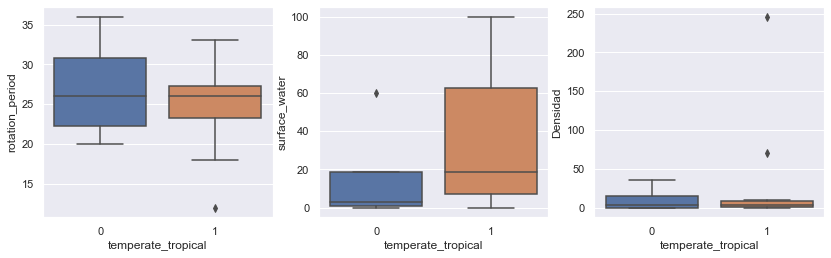

In [58]:
sns.set(rc={'figure.figsize':(14,4)})
fig, axs = plt.subplots(ncols=3)
plt.gcf().subplots_adjust(bottom=0.15)
sns.boxplot(x='temperate_tropical', y='rotation_period', data=planets_df, ax=axs[0])
sns.boxplot(x='temperate_tropical', y='surface_water', data=planets_df, ax=axs[1])
sns.boxplot(x='temperate_tropical', y='Densidad',data=planets_df, ax=axs[2]);

- Rotations above 24 are above the median (boxplot central axis).
- % of water surface above 10%, avoid unsuitable planets.
- Density below 50 people per Km² is more than enough to filter out overly populated planets.

In [59]:
planets_df_sel = planets_df[(planets_df.Densidad<50) 
                            & (planets_df.rotation_period>24) 
                            & (planets_df.surface_water>10)]
print(planets_df_sel.shape)
planets_df_sel

(7, 8)


,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Naboo,26.0,12120.0,temperate,1,1.0,12.0,4.500000e+09,9.751185
Kamino,27.0,19720.0,temperate,1,1.0,100.0,1.000000e+09,0.818533
Kashyyyk,26.0,12765.0,tropical,1,1.0,60.0,4.500000e+07,0.087907
Corellia,25.0,11000.0,temperate,1,1.0,70.0,3.000000e+09,7.891981
Rodia,29.0,7549.0,hot,0,1.0,60.0,1.300000e+09,7.261304
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,5.000000e+08,0.653990
Muunilinst,28.0,13800.0,temperate,1,1.0,25.0,5.000000e+09,8.357222


There are 7 planets left. Let's now see a scatter plot with a summary of the main variables:

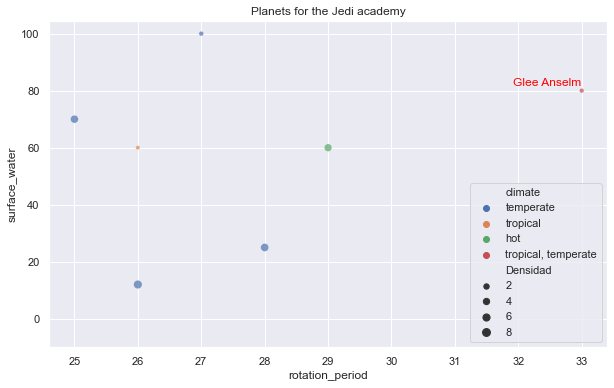

In [60]:
sns.set(rc={'figure.figsize':(10,6)});
g = sns.scatterplot(x="rotation_period", y = "surface_water", data=planets_df_sel
                            , alpha =0.7
                            , hue= "climate"
                            , size="Densidad")
g.set_title('Planets for the Jedi academy');
plt.legend(loc='lower right')
limit = g.set(ylim=(-10, None));

# search for the planet to be labeled
planets_df_sel_final = planets_df_sel[(planets_df_sel.rotation_period>30)&(planets_df_sel.surface_water>60) ]
# insert the label
p = plt.annotate(planets_df_sel_final.index[0],
             (planets_df_sel_final.rotation_period[0],planets_df_sel_final.surface_water[0])
             , textcoords="offset points" # offsets the point
             , xytext=(0,5)  # offset distance
             , ha='right'
            , color="red")   # centered)


Looks like we already have the perfect destination for the Jedi academy! His name is **Glee Anselm**

Let's look at your data:

In [61]:
planets_df_sel_final

,rotation_period,diameter,climate,temperate_tropical,gravity,surface_water,population,Densidad
name,,,,,,,,
Glee Anselm,33.0,15600.0,"tropical, temperate",1,1.0,80.0,500000000.0,0.65399


< [Colecciones de objetos: numpy](modulo1_tema4_Py_31_numpy.ipynb) | [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Control de flujo](modulo1_tema4_Py_40_contr_flujo.ipynb) >

__[Open in Colab](https://colab.research.google.com/github/griu/msc_python/blob/master/modulo1_tema4_Py_32_pandas.ipynb)__